In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the data
data = pd.read_csv('med_insurance.csv')  # Change the path to your dataset

# Step 2: Preprocess the data
# Convert categorical data to numerical data
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

# Step 3: Feature Engineering
data['bmi_age_interaction'] = data['bmi'] * data['age']
data['smoker_bmi_interaction'] = data['smoker'] * data['bmi']
print(data.head())

# Separate the features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Step 4: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 7: Train the model with Regularization
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_

# Step 8: Evaluate the model
y_pred = best_ridge.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Save actual and predicted charges to a CSV file with 2 decimal places
results = pd.DataFrame({'Actual': y_test.round(2), 'Predicted': y_pred.round(2)})
results.to_csv('medical_insurance_prediction.csv', index=False)

   age  sex     bmi  children  smoker  region      charges  \
0   19    1  27.900         0       1       3  16884.92400   
1   18    0  33.770         1       0       2   1725.55230   
2   28    0  33.000         3       0       2   4449.46200   
3   33    0  22.705         0       0       1  21984.47061   
4   32    0  28.880         0       0       1   3866.85520   

   bmi_age_interaction  smoker_bmi_interaction  
0              530.100                    27.9  
1              607.860                     0.0  
2              924.000                     0.0  
3              749.265                     0.0  
4              924.160                     0.0  
Mean Squared Error: 20395399.00265108
Root Mean Squared Error: 4516.126548564719
R^2 Score: 0.8686275964597379


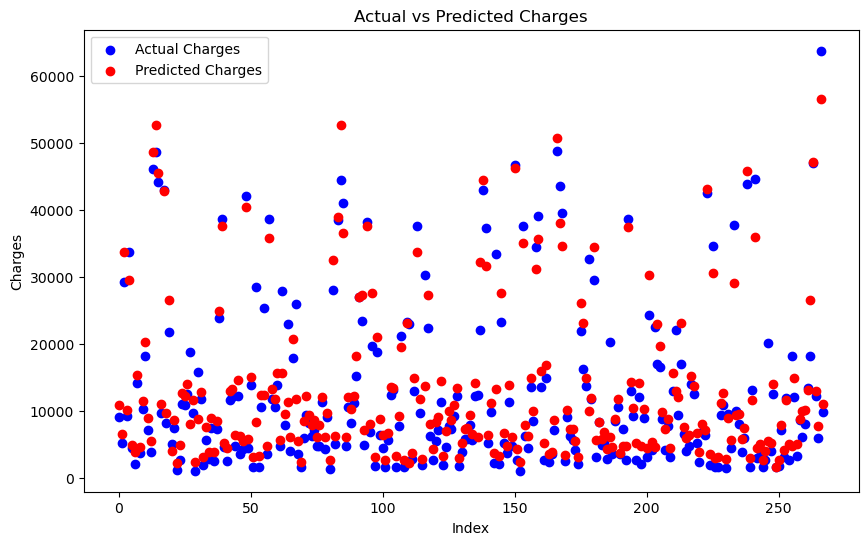

<Figure size 1000x600 with 0 Axes>

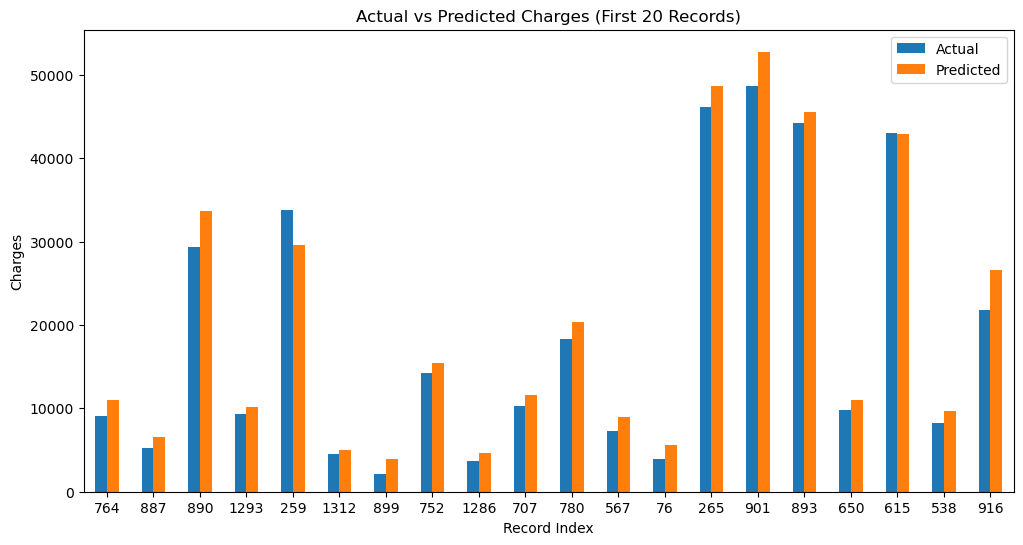

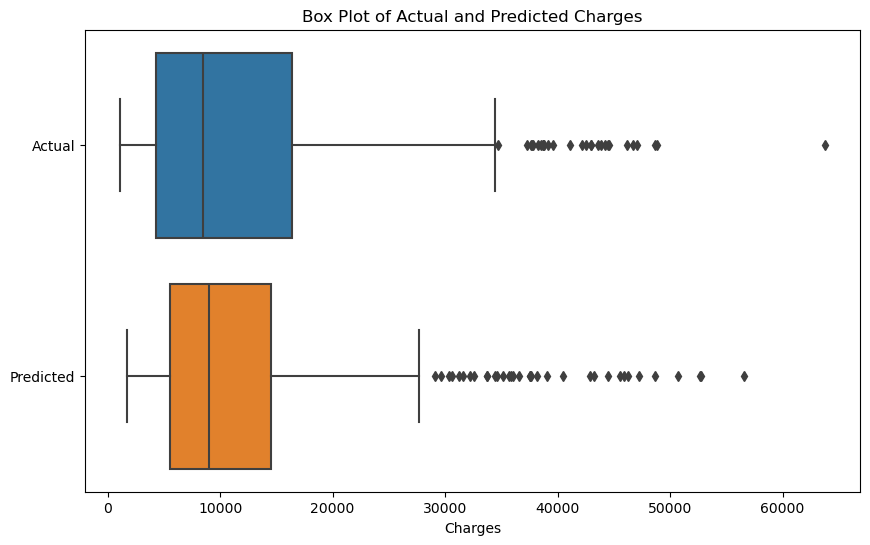

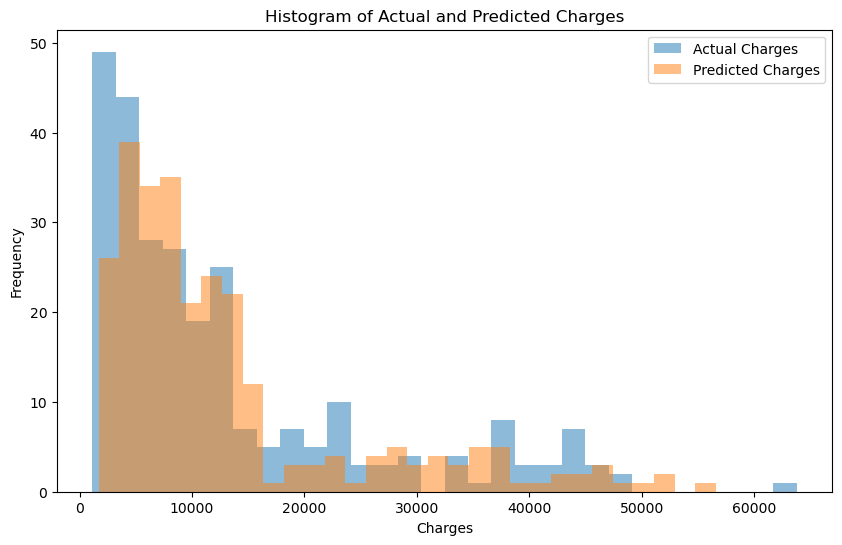

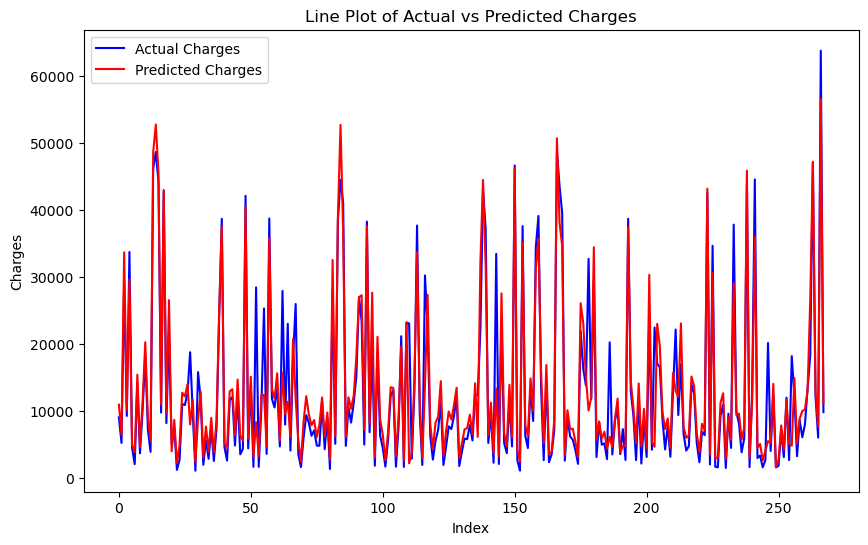

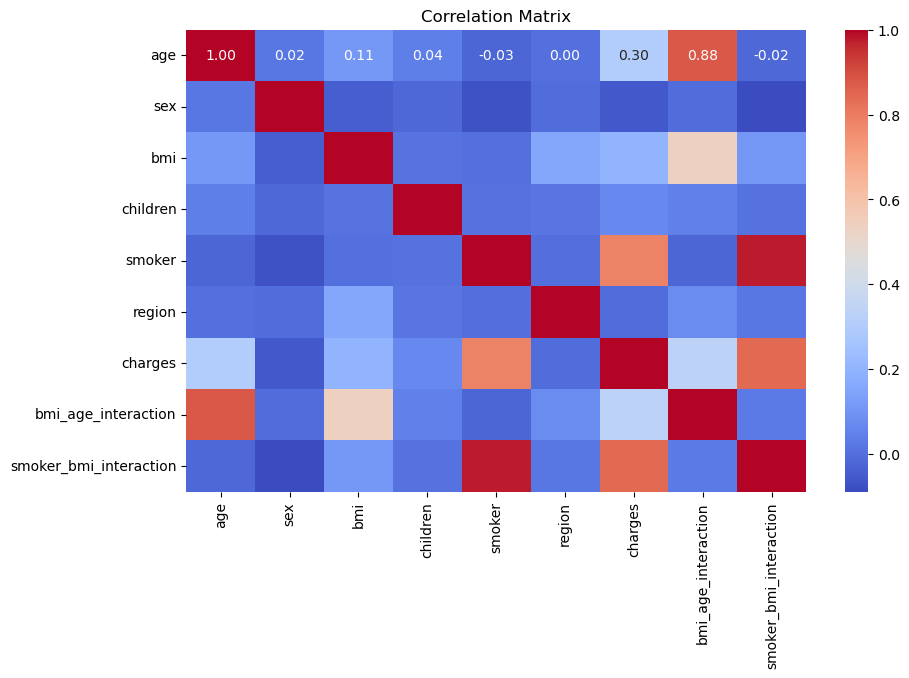

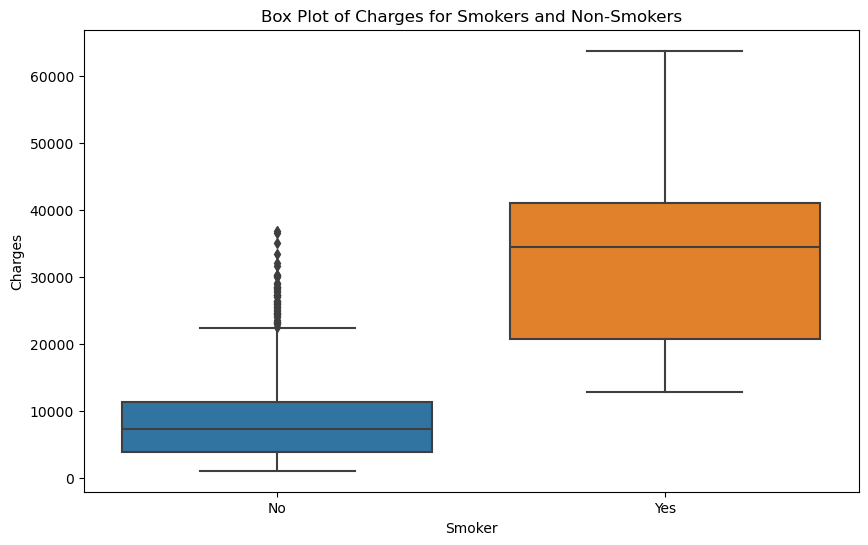

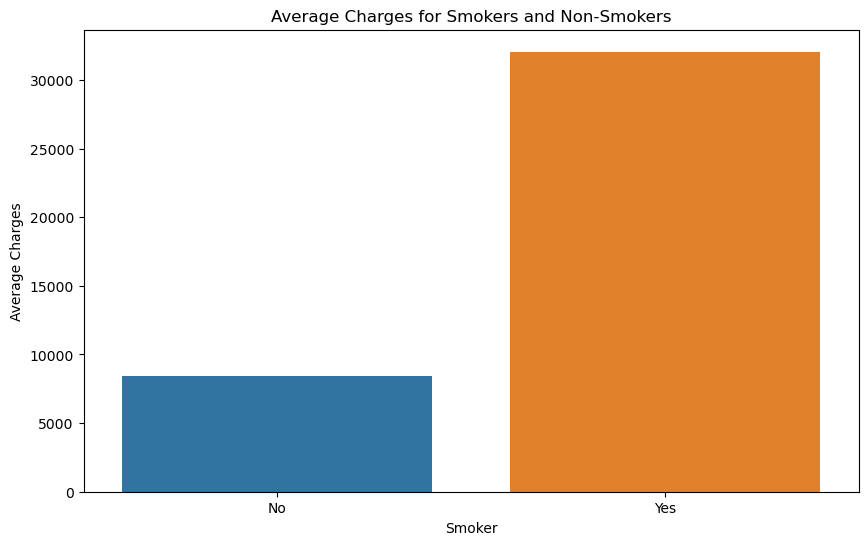

In [3]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Charges')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Charges')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
results.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Charges (First 20 Records)')
plt.ylabel('Charges')
plt.xlabel('Record Index')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results, orient="h")
plt.title('Box Plot of Actual and Predicted Charges')
plt.xlabel('Charges')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(results['Actual'], bins=30, alpha=0.5, label='Actual Charges')
plt.hist(results['Predicted'], bins=30, alpha=0.5, label='Predicted Charges')
plt.title('Histogram of Actual and Predicted Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

# Line Plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Charges', color='blue')
plt.plot(y_pred, label='Predicted Charges', color='red')
plt.title('Line Plot of Actual vs Predicted Charges')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box Plot for Smoker vs Non-Smoker
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Box Plot of Charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Bar Plot for Average Charges by Smoker Status
plt.figure(figsize=(10, 6))
avg_charges = data.groupby('smoker')['charges'].mean().reset_index()
avg_charges['smoker'] = avg_charges['smoker'].map({0: 'No', 1: 'Yes'})
sns.barplot(x='smoker', y='charges', data=avg_charges)
plt.title('Average Charges for Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()